# Random Forest (regression)

In [3]:
## prepare data
import pandas as pd
import numpy as np
train_final = pd.read_csv('train_final.csv')
x = train_final.drop(['Id', 'SalePrice'], axis=1)
y = train_final['SalePrice']

In [25]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

randomForest = ensemble.RandomForestRegressor()
grid_para_forest = [{
    "n_estimators": [250, 500],
    "min_samples_leaf": range(10,15),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_forest = grid_search_forest.fit(x, y)

In [39]:
print("Best parameters found: ", grid_search_forest.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search_forest.best_score_)))


Best parameters found:  {'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 250, 'random_state': 42}
Lowest RMSE found:  32353.161815955562


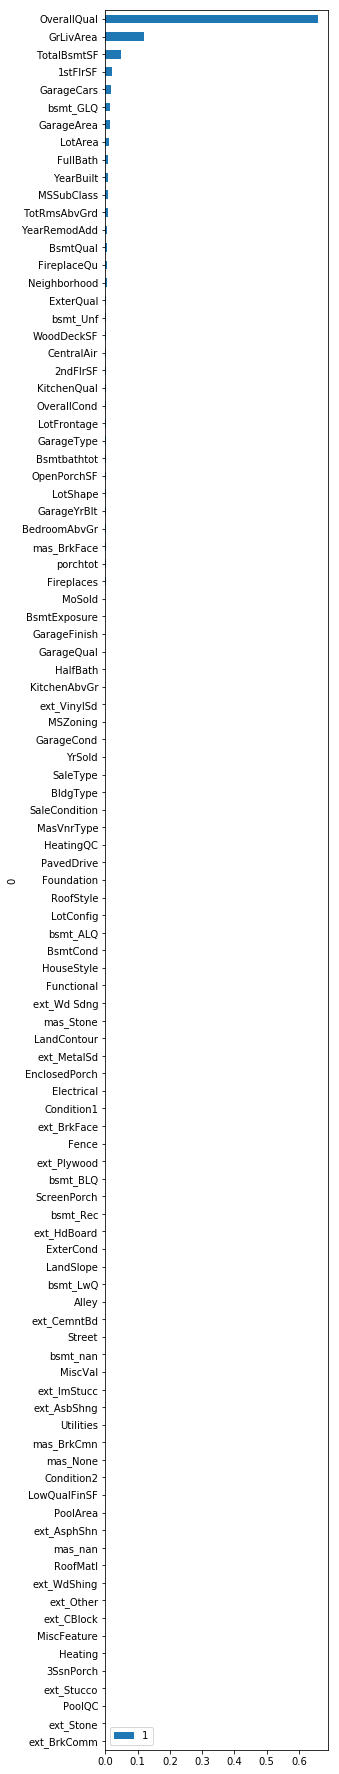

In [42]:
import matplotlib.pyplot as plt
pd.DataFrame(list(zip(x.columns, grid_search_forest.best_estimator_.feature_importances_ ))).set_index(0).sort_values(1).plot.barh()
plt.rcParams['figure.figsize'] = 4, 32

# Extreme Gradient Boosting Random Forest (regression)

In [ ]:
# !pip install xgboost

In [53]:
import xgboost as xgb
xgbforest = xgb.XGBRegressor()
grid_para_xgbforest = [{
    "colsample_bytree": np.linspace(0.1, 0.9, 9),
    'max_depth':[2, 4, 6],
    "n_estimators":[500, 800, 1000, 2000],
    "random_state": [42]}]
grid_search_xgbforest = GridSearchCV(estimator = xgbforest, param_grid = grid_para_xgbforest, 
                                     scoring = 'neg_mean_squared_error', cv = 5, n_jobs=-1)

grid_search_xgbforest = grid_search_xgbforest.fit(x, y)

In [54]:
print("Best parameters found: ", grid_search_xgbforest.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search_xgbforest.best_score_)))

Best parameters found:  {'colsample_bytree': 0.30000000000000004, 'max_depth': 2, 'n_estimators': 1000, 'random_state': 42}
Lowest RMSE found:  25274.277318629447


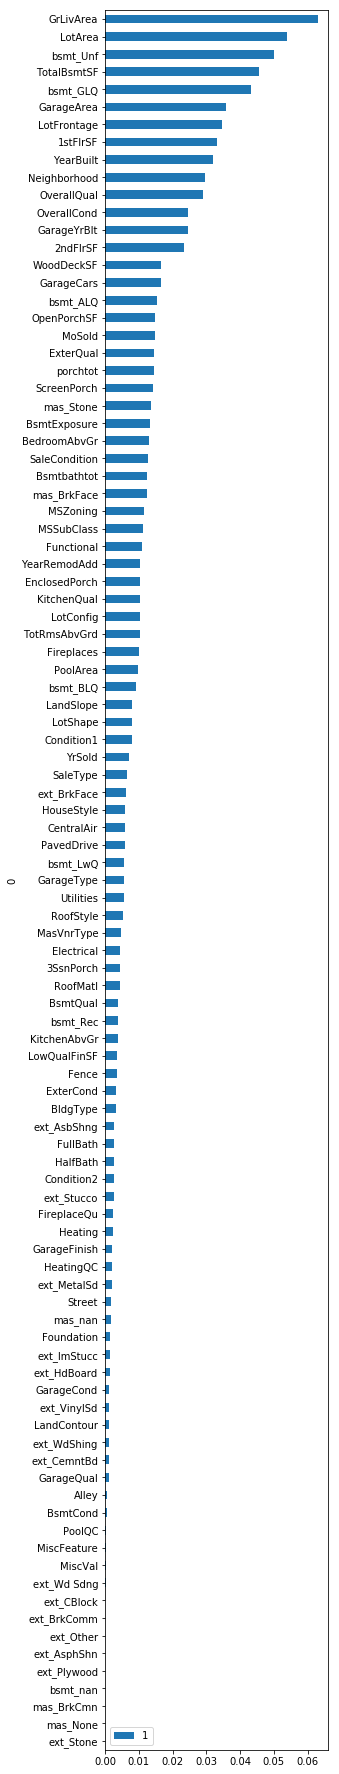

In [55]:
pd.DataFrame(list(zip(x.columns, grid_search_xgbforest.best_estimator_.feature_importances_ ))).set_index(0).sort_values(1).plot.barh()
plt.rcParams['figure.figsize'] = 4, 32